# LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import preprocessing
from plotly import express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

# DATASET

In [ ]:
data = pd.read_csv('../data/chotot.csv')

In [ ]:
data.head()

Unnamed: 0                                            subject  size  \
0           0     Bán nhà Huỳnh Tấn Phát 44m2 2 tầng giá 3 tỷ 75  44.0   
1           1              Mặt Tiền Hoa Sữa. P7. khu QH miếu nổi  65.0   
2           2          NHÀ HẼM ĐỔ XUÂN HỢP. PHƯỚC LONG B. QUẬN 9  44.8   
3           3  Chính chủ cần bán nhà thạnh lộc 44 q12,hẻm xe tải  26.0   
4           4     Nhà Đẹp Ở Ngay-Nguyễn Trọng Tuyển-P2-Tân Bình.  22.0   

    width  length  room  area    ward  toilet  living size  floor  house type  \
0     3.5    12.0   2.0   102  9466.0     2.0          NaN    1.0         3.0   
1     3.8    17.0   6.0   111  9328.0     6.0        238.0    NaN         1.0   
2     3.2    14.0   2.0   104  9256.0     2.0         44.8    1.0         3.0   
3    35.0     8.0   2.0   107  9228.0     2.0         52.0    1.0         3.0   
4  3500.0  6500.0   2.0   112  9311.0     NaN         55.0    NaN         3.0   

   zero deposit  direction                street  escrow can deposit  \
0         False        NaN  Đường Huỳnh Tấn Phát                   2   
1         False        NaN         Đường Hoa Sữa                   2   
2         False        NaN     Đường Đỗ Xuân Hợp                   2   
3         False        8.0     Đường Hà Huy Giáp                   2   
4         False        1.0    Nguyễn Trọng Tuyển                   2   

   property legal document  protection entitlement  furnishing sell  \
0                      1.0                   False              1.0   
1                      1.0                   False              1.0   
2                      1.0                   False              3.0   
3                      3.0                   False              3.0   
4                      1.0                   False              NaN   

         price  
0   3750000000  
1  18500000000  
2    890000000  
3   1300000000  
4   3550000000

In [ ]:
data = data.infer_objects()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95400 entries, 0 to 95399
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               95400 non-null  int64  
 1   subject                  95400 non-null  object 
 2   size                     95396 non-null  float64
 3   width                    80154 non-null  float64
 4   length                   79228 non-null  float64
 5   room                     95396 non-null  float64
 6   area                     95400 non-null  int64  
 7   ward                     95068 non-null  float64
 8   toilet                   73393 non-null  float64
 9   living size              62158 non-null  float64
 10  floor                    60428 non-null  float64
 11  house type               95349 non-null  float64
 12  zero deposit             95400 non-null  bool   
 13  direction                28474 non-null  float64
 14  street                

In [ ]:
data.isnull().sum()

Unnamed: 0                     0
subject                        0
size                           4
width                      15246
length                     16172
room                           4
area                           0
ward                         332
toilet                     22007
living size                33242
floor                      34972
house type                    51
zero deposit                   0
direction                  66926
street                     33243
escrow can deposit             0
property legal document    21163
protection entitlement         0
furnishing sell            50326
price                          0
dtype: int64

# DATA PREPROCESSING

In [ ]:
data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

size                        0.004193
width                      15.981132
length                     16.951782
room                        0.004193
ward                        0.348008
toilet                     23.068134
living size                34.844864
floor                      36.658281
house type                  0.053459
direction                  70.153040
street                     34.845912
property legal document    22.183438
furnishing sell            52.752621
dtype: float64

Loại bỏ các attribute nào có giá trị Nan trên 50% tổng số dữ liệu

In [ ]:
del data['furnishing sell']
del data['direction']

## Nan

In [ ]:
data.columns = ['index', *data.columns[1:]]
data['street'] = data['street'].fillna('')
imputer = KNNImputer(n_neighbors = 5)
imputer.fit(data.select_dtypes('float64'))
cols_float = list(data.select_dtypes('float64').columns)
data[cols_float] = imputer.transform(data.select_dtypes('float64'))

In [ ]:
data.head()

index                                            subject  size   width  \
0      0     Bán nhà Huỳnh Tấn Phát 44m2 2 tầng giá 3 tỷ 75  44.0     3.5   
1      1              Mặt Tiền Hoa Sữa. P7. khu QH miếu nổi  65.0     3.8   
2      2          NHÀ HẼM ĐỔ XUÂN HỢP. PHƯỚC LONG B. QUẬN 9  44.8     3.2   
3      3  Chính chủ cần bán nhà thạnh lộc 44 q12,hẻm xe tải  26.0    35.0   
4      4     Nhà Đẹp Ở Ngay-Nguyễn Trọng Tuyển-P2-Tân Bình.  22.0  3500.0   

   length  room  area    ward  toilet  living size  floor  house type  \
0    12.0   2.0   102  9466.0     2.0        78.04    1.0         3.0   
1    17.0   6.0   111  9328.0     6.0       238.00    3.6         1.0   
2    14.0   2.0   104  9256.0     2.0        44.80    1.0         3.0   
3     8.0   2.0   107  9228.0     2.0        52.00    1.0         3.0   
4  6500.0   2.0   112  9311.0     2.2        55.00    3.2         3.0   

   zero deposit                street  escrow can deposit  \
0         False  Đường Huỳnh Tấn Phát                   2   
1         False         Đường Hoa Sữa                   2   
2         False     Đường Đỗ Xuân Hợp                   2   
3         False     Đường Hà Huy Giáp                   2   
4         False    Nguyễn Trọng Tuyển                   2   

   property legal document  protection entitlement        price  
0                      1.0                   False   3750000000  
1                      1.0                   False  18500000000  
2                      1.0                   False    890000000  
3                      3.0                   False   1300000000  
4                      1.0                   False   3550000000

In [ ]:
data.isnull().sum()

index                      0
subject                    0
size                       0
width                      0
length                     0
room                       0
area                       0
ward                       0
toilet                     0
living size                0
floor                      0
house type                 0
zero deposit               0
street                     0
escrow can deposit         0
property legal document    0
protection entitlement     0
price                      0
dtype: int64

In [ ]:
data = data.infer_objects()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95400 entries, 0 to 95399
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    95400 non-null  int64  
 1   subject                  95400 non-null  object 
 2   size                     95400 non-null  float64
 3   width                    95400 non-null  float64
 4   length                   95400 non-null  float64
 5   room                     95400 non-null  float64
 6   area                     95400 non-null  int64  
 7   ward                     95400 non-null  float64
 8   toilet                   95400 non-null  float64
 9   living size              95400 non-null  float64
 10  floor                    95400 non-null  float64
 11  house type               95400 non-null  float64
 12  zero deposit             95400 non-null  bool   
 13  street                   95400 non-null  object 
 14  escrow can deposit    

In [ ]:
data['property legal document'] = data['property legal document'].astype(int)
data.head()

index                                            subject  size   width  \
0      0     Bán nhà Huỳnh Tấn Phát 44m2 2 tầng giá 3 tỷ 75  44.0     3.5   
1      1              Mặt Tiền Hoa Sữa. P7. khu QH miếu nổi  65.0     3.8   
2      2          NHÀ HẼM ĐỔ XUÂN HỢP. PHƯỚC LONG B. QUẬN 9  44.8     3.2   
3      3  Chính chủ cần bán nhà thạnh lộc 44 q12,hẻm xe tải  26.0    35.0   
4      4     Nhà Đẹp Ở Ngay-Nguyễn Trọng Tuyển-P2-Tân Bình.  22.0  3500.0   

   length  room  area    ward  toilet  living size  floor  house type  \
0    12.0   2.0   102  9466.0     2.0        78.04    1.0         3.0   
1    17.0   6.0   111  9328.0     6.0       238.00    3.6         1.0   
2    14.0   2.0   104  9256.0     2.0        44.80    1.0         3.0   
3     8.0   2.0   107  9228.0     2.0        52.00    1.0         3.0   
4  6500.0   2.0   112  9311.0     2.2        55.00    3.2         3.0   

   zero deposit                street  escrow can deposit  \
0         False  Đường Huỳnh Tấn Phát                   2   
1         False         Đường Hoa Sữa                   2   
2         False     Đường Đỗ Xuân Hợp                   2   
3         False     Đường Hà Huy Giáp                   2   
4         False    Nguyễn Trọng Tuyển                   2   

   property legal document  protection entitlement        price  
0                        1                   False   3750000000  
1                        1                   False  18500000000  
2                        1                   False    890000000  
3                        3                   False   1300000000  
4                        1                   False   3550000000

## Histogram

### Property legal document

In [ ]:
fig = go.Figure(px.histogram(data, x = 'property legal document', title = 'Histogram of property legal document'))
fig.update_layout(title_x=0.5)
fig.show()

### Protection entitlement

In [ ]:
fig = go.Figure(px.histogram(data, x = 'protection entitlement', title = 'Histogram of protection entitlement'))
fig.update_layout(title_x=0.5)
fig.show()

### Escrow can deposit

In [ ]:
fig = go.Figure(px.histogram(data, x = 'escrow can deposit', title = 'Histogram of escrow can deposit'))
fig.update_layout(title_x=0.5)
fig.show()

Mật độ phân bố của thuộc tính **Escrow can deposit** chỉ phân bố trong một nơi nên thuộc tính này sẽ không ảnh hưởng đến biến phụ thuộc **Price** mà ta cần dự đoán

### Zero deposit

In [ ]:
fig = go.Figure(px.histogram(data, x = 'zero deposit', title = 'Histogram of zero deposit'))
fig.update_layout(title_x=0.5)
fig.show()

Mật độ phân bố của thuộc tính **Zero deposit** chỉ phân bố trong một nơi nên thuộc tính này sẽ không ảnh hưởng đến biến phụ thuộc **Price** mà ta cần dự đoán

### Land area

In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=("Histogram of width", "Histogram of length"))
fig.append_trace(go.Histogram(x = 1/(np.log(data['width'])), nbinsx=40), row = 1, col = 1)
fig.append_trace(go.Histogram(x = 1/(np.log(data['length'])), nbinsx=40), row = 1, col = 2)

fig.update_layout(height=600, width= np.inf, title_text="Distribution of land area", showlegend=False, title_x = 0.5)
fig.show()

Histogram về mật độ phân bố **Width** vs **Lenght** đều bị ảnh hưởng bởi một vài dữ liệu sai số quá cao so với sự phân bố của các dữ liệu còn lại.

## Heatmap of correlation matrix
Ma trận tương quan là một bảng thể hiện các hệ số tương quan giữa các tập hợp các biến. Ma trận tương quan hiển thị hệ số tương quan cho sự kết hợp của tập hợp các biến. Đường chéo của bảng luôn là một tập hợp các tương quan chính nó, nên mối tương quan giữa một biến và chính nó luôn là 1.

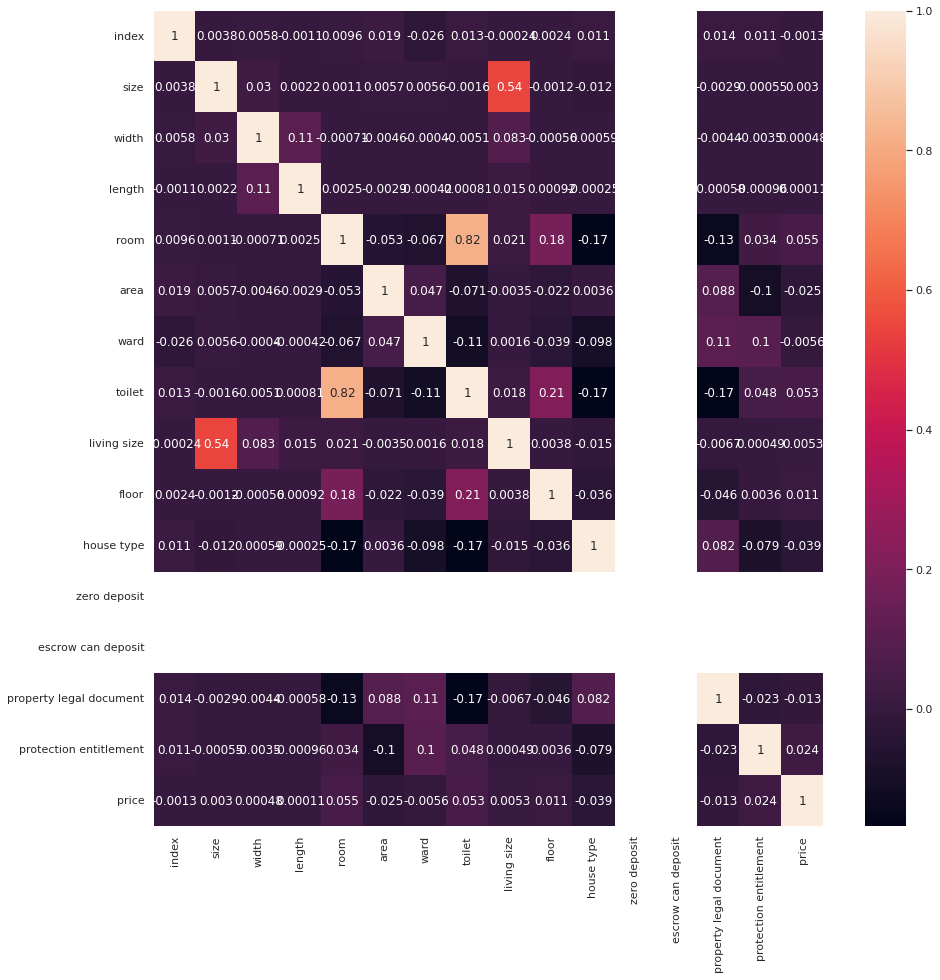

In [ ]:
cormap = data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cormap, annot = True)

Từ bản đồ nhiệt của ma trận tương quan ở trên, có thể hiểu rằng nhiều thuộc tính đang thể hiện mối tương quan tuyến tính với nhau. Vì vậy, ta có thẻ loại bỏ các sự dư thừa thuộc tính trong tập dữ liệu.

Thông qua ma trận tương quan, có thể thấy được 2 thuộc tính **Zero deposit** vs **Escrow can deposit** không có tương quan tuyến tính với các thuộc tính còn lại trong tập dữ liệu. Vì vậy cần loại bỏ 2 thuộc tính dư thừa ra khỏi tập dữ liệu.

In [ ]:
del data['index']
del data['property legal document']
del data['protection entitlement']
del data['zero deposit']
del data['escrow can deposit']

## Boxplot

In [ ]:
sns.set_theme(style="whitegrid")

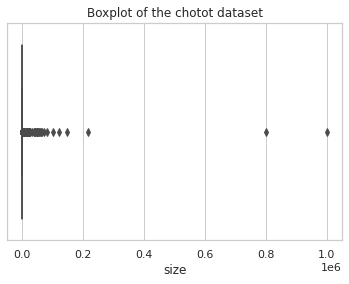

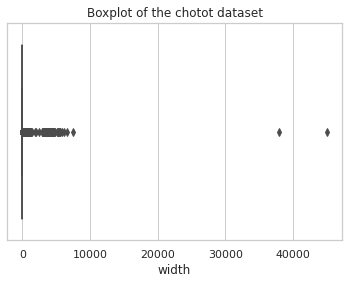

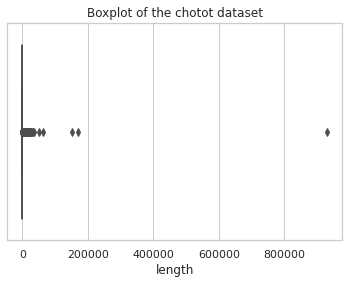

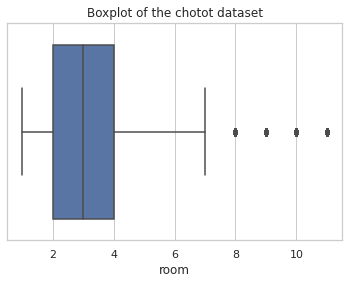

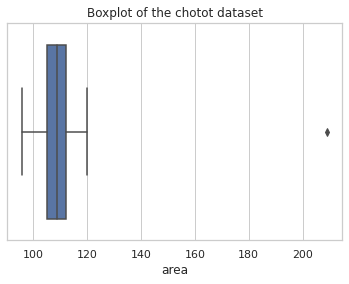

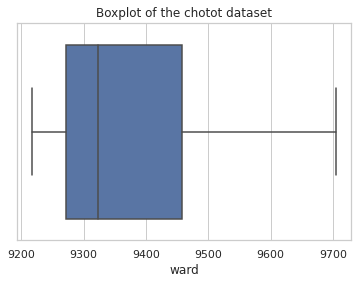

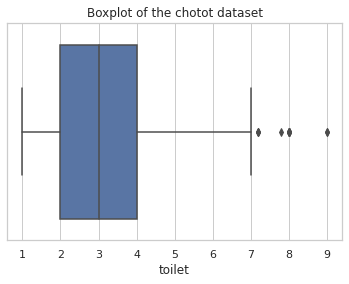

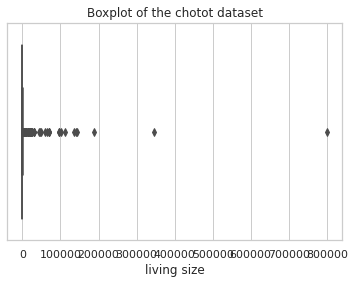

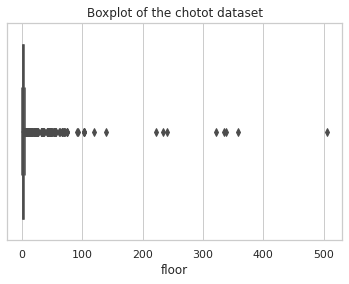

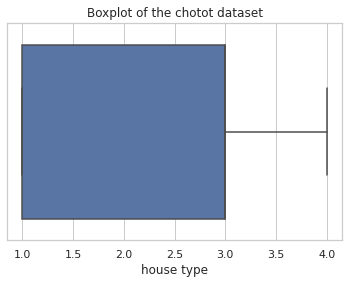

In [ ]:
for i in data.columns[1:11]:
  sns.boxplot(x=data[i])
  plt.title('Boxplot of the chotot dataset')
  plt.show()

In [ ]:
# loại bỏ các giá trị ngoại lai bằng phương pháp phạm vi liên phân vị (IQR)

Q1 = data.quantile(0.25) # 25% dữ liệu đầu tiên
Q3 = data.quantile(0.75) # 75% dữ liệu đầu tiên
IQR = Q3 - Q1 # IQR = InterQuartile Range

scale = 2 # Đối với phân phối thông thường, tỷ lệ = 1,5
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

lower_outliers = (data[data.columns[1:11]] < lower_lim)
upper_outliers = (data[data.columns[1:11]] > upper_lim)

In [ ]:
# kiểm tra các giá trị ngoại lệ kết quả được tính bằng phương pháp trên (được trình bày dưới dạng các giá trị không rỗng)

data[data.columns[1:11]][(lower_outliers | upper_outliers)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95400 entries, 0 to 95399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   size         6043 non-null   float64
 1   width        10294 non-null  float64
 2   length       2607 non-null   float64
 3   room         3157 non-null   float64
 4   area         1 non-null      float64
 5   ward         0 non-null      float64
 6   toilet       2 non-null      float64
 7   living size  3184 non-null   float64
 8   floor        1631 non-null   float64
 9   house type   0 non-null      float64
dtypes: float64(10)
memory usage: 7.3 MB


In [ ]:
# tạo DataFrame mới mà không có các ngoại lệ

num_cols = list(data.columns[2:13])
data_out_IQR = data[~((data[num_cols] < (Q1 - 2 * IQR)) |(data[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]

In [ ]:
data_out_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79187 entries, 0 to 95399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subject      79187 non-null  object 
 1   size         79187 non-null  float64
 2   width        79187 non-null  float64
 3   length       79187 non-null  float64
 4   room         79187 non-null  float64
 5   area         79187 non-null  int64  
 6   ward         79187 non-null  float64
 7   toilet       79187 non-null  float64
 8   living size  79187 non-null  float64
 9   floor        79187 non-null  float64
 10  house type   79187 non-null  float64
 11  street       79187 non-null  object 
 12  price        79187 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 8.5+ MB


In [ ]:
temp_data = data_out_IQR.copy()

In [ ]:
#data_out_IQR.to_csv('data_out_IQR.csv', index=False, encoding="utf-8-sig")

In [ ]:
#temp_data = pd.read_csv('../data/data_out_IQR.csv')
#temp_data['street'] = temp_data['street'].fillna('')

## Street data processing

In [ ]:
print(temp_data['street'].values)

['Đường Huỳnh Tấn Phát' 'Đường Hoa Sữa' 'Đường Đỗ Xuân Hợp' ... '' '' '']


In [ ]:
streets_data = [street.lower().strip() for street in temp_data['street'].values]
print("Số lượng tên đường null:" , streets_data.count(""))

Số lượng tên đường null: 27272


Lấy danh sách những tên đường chỉ xuất hiện 1 lần và chỉ có 1 ký tự để lọc những tên đường nhập lỗi

In [ ]:
titles_data = temp_data['subject'].values

In [ ]:
streets_count = [[streets_data[i],i] for i in range(len(streets_data)) if streets_data.count(streets_data[i]) == 1 and len(streets_data[i]) == 1]

In [ ]:
ord_streets_remove = [i[1] for i in streets_count if len(i[0]) == 1]
print(ord_streets_remove)

[10032, 20000, 20774, 32251]


In [ ]:
for ord in ord_streets_remove: 
  streets_data[ord] = ""

Lấy danh sách tên đường lưu vào biến streets_ok

In [ ]:
temp_streets = streets_data.copy()
streets_ok = []
for i in range(len(streets_data)):
  if len(streets_data[i]) > 1:
    street_name = streets_data[i]
    if "." in street_name:
      street_name = street_name.replace(".","").strip()
    if "," in street_name:
      street_name = street_name.replace(",","").strip()
    if "//" in street_name:
      street_name = street_name.replace("//","").strip()
    if "  " in street_name:
      street_name = street_name.replace("  "," ").strip()
    if street_name[0:5] == "đường":
      temp_streets[i] = street_name[5:].strip()
      streets_ok.append(street_name[5:].strip())
    else:
      streets_ok.append(street_name)

Dựa vào thống kê tên đường, lọc ra tên đường không đúng

In [ ]:
streets = list(set(streets_ok))
streets = streets[1:]
print(streets)

['thanh niên', 'hẻm 199 lê quang định', 'hưng hoá', 'tam thôn', 'bình thành', '535', 'ql1', '24 trương phước phan', 'lk 16 18', 'phan van trij', 'hẻm 10 đường lưu chí hiếu', 'dt 2-5', 'tk 5/24 trần hưng đạo', 'ngô chí quốc', 'mã siêu', 'tl15 - phường thạnh lộc', 'trịnh đình thảo', 'hiệp thành 45', 'lưu hữu phước (gần cầu gạch cát)', '275 quang trung', 'bình đức', 'tl54', 'hẻm 386 đường hòa hảo', 'phạm văn chí', 'xuân thới sơn', '808 hiep binh phuoc', 'phan hồ tây', 'hẻm 621 trần thị hè', 'hoàng phan thai', 'huyền trân công chúa', 'số 1a', 'đường nguyễn sơn', 'hẻm 102 đường tập đoàn 6b', 'khu dân cư lý chiêu hoàng', 'hẻm 50 dương quảng hàm', 'tân kỳ tân qúy', 'trung lân', 'hẻm 33 đường số 27', 'đường số 10', '2266/45 huỳnh tấn phát', 'go den', 'hẻm đường 8', 'nha ơ trung đong 5 học mon', 'lo lu', 'dc7', 'võ trần chí', 'đông hưng thuận 09', 'vân côi', 'đoàn thị điểm', 'linh đông', 'quốc lộ 13 cũ', 'hiệp thành 10', 'hẽm 63 nguyễn đình ch', 'huỳnh tấn phát||4100', 'hậu lân 3', 'ng

In [ ]:
streets.sort(reverse=True,key=lambda x:len(x))
print(streets)

['số 5 bhh qbình tân gần sieu thị aeon tân phú 42*13hẻm 8m thông 2 đg lớn số5 và số4 khu an ninh dân trí cao nhà lầu đồng bộ 4 tấm đúc 5 pn 4tolet giá 6t8 tl', 'giao lộ ngã tư nguyễn văn linh-phạm hùng (giao lo nga tu nguyen van linh-pham hung)', 'số 8 đường nhựa hẻm 2 xe tài tránh nhau kinh doanh buôn bán khu dân cư đông đúc', '11a đường 149c khu nhà ở điền phúc thành kp trường lưu plong trường tp thủ đức', '67/78 đường số 1 - khu dân cư vĩnh lộc - bình hưng hòa b - quận bình tân - hcm', 'khu dân cư 6b intresco đường phạm hùng nối dài xã bình hưng huyện bình chánh', 'số 23/24 và 23/26 phường hiệp bình phước quận thủ đức hồ chí minh', 'nguyễn cửu phú tân kiên bình chánh thành phố hồ chí minh việt nam', 'mặt tiền đường số 2 khu biệt thự wiu sông hiệp bình phước thủ đức', 'số 61/8/16 đường đào tông nguyên xã phú xuân nhà bè hồ chí minh', 'đư212 / duong la xuan oai phường long trường quận 9 hồ chí minh', 'nữ dân công liên ấp 234 xã vĩnh lộc a huyện bình chánh tphcm', '9a đường thạnh xuân 

In [ ]:
streets_remove = ["số","mặt tiền đường số","huỳnh tấn"]
for i in streets_remove:
  if i in streets:
    streets.remove(i)

Cập nhật lại danh sách tên đường dựa vào title

In [ ]:
for ord in range(len(titles_data)):
  if (streets_data[ord] == "") or (len(streets_data[ord]) <= 3) or (len(streets_data[ord]) > 15):
    for street in streets:
      if len(street) > 1:
        if len(street) > 4:
          if street in titles_data[ord].lower().strip():
            temp_streets[ord] = street
            break
        else:
          if "đường " + street in titles_data[ord].lower().strip():
            temp_streets[ord] = street
            break

In [ ]:
print(temp_streets)
print("Số lượng tên đường null:" , temp_streets.count(""))

['huỳnh tấn phát', 'hoa sữa', 'phước long b', 'gò dầu', 'phạm văn chiêu', 'cao lỗ', 'lê đình cẩn', 'đinh bộ lĩnh', 'dương đình nghệ', 'quang trung', 'nguyễn thị búp', 'gò cát', 'gò dầu', 'hiệp thành', '', 'tân hoà đông', 'huỳnh văn nghệ', 'nguyễn', 'trần kế xương', 'tx 52', 'lê văn quới', 'tôn đản', 'mai văn ngọc', 'bình phú', 'trường lưu', 'trần quang diệu||7336', 'hẻm xe hơi', 'tây thạnh', 'nguyễn trọng tuyển', 'kênh nước đen', 'dương đức hiền', 'đội cung', 'đoàn thị điểm', '', 'hương lộ 11', 'hà huy giáp', 'đường số 2', 'nguyễn trãi', 'cầu xây', 'nguyễn xí', 'chu văn an', 'huỳnh tấn phát', 'đinh đức thiện _dt826', 'bình tiên', 'xe tải', 'hoài thanh', 'nguyễn văn quá', 'liên tỉnh 5', 'thống nhất', '9', 'hồ văn tư', 'số 2', 'vạn kiếp', 'bà hom', 'nguyễn cửu phú', 'lê đức thọ', 'nguyễn thị thập', 'quận 8', 'phan đình phùng', 'đoàn văn bơ', 'bùi minh  trực', 'lò gốm', 'hóc môn', '', 'lê văn phan', 'ht17', 'quốc lộ 1', 'phạm văn chiêu', 'phạm văn chiêu', 'hậu giang', 'tân thới hiệp 2

Cập nhật lại tên đường mới dựa vào tên đường cũ nếu tên đường cũ quá dài hoặc quá ngắn

In [ ]:
streets.sort(reverse=False,key=lambda x:len(x))
print(streets)

['7', '3', 'd', '1', '4', '5', '6', '8', 't', 'f', '2', '9', 'b', '38', '5b', 'n4', '28', '7a', 'nơ', '92', 't6', 'a4', '70', 'dc', '18', 'võ', '4c', '22', 'b6', '47', 'ht', '13', '6c', 't1', '6a', 'tl', '32', '14', '45', '40', 'd1', '3d', '59', '17', '19', '1c', '5d', 'h1', 'ta', '12', '85', 't9', '4b', '31', '3b', 'c6', '33', '24', 's3', '42', '5f', 't8', 'vl', '62', '23', '1a', '67', 'n3', '30', '54', '6d', '49', 'g8', '55', 'c7', 'hd', 'd2', 'đá', '37', '81', '26', 'd3', 't3', 's5', '08', '11', 't5', '25', '8c', 'b7', '16', '36', 'b2', '64', 'a5', 'd8', 'a1', '53', '29', '2d', '99', '46', '41', '4a', '65', 'd9', 'c4', '8a', '15', '27', 'xx', '56', 'd7', 'g7', 'm1', '51', '7l', '5k', '48', '10', 'd6', 'c2', 's9', '2a', 'le', 's1', '66', '97', 'cv', 'bb', 'tx', '98', 'nb', '61', 'n1', '50', '5e', '58', '63', '1b', 't4', '60', '79', '34', '35', '77', 'd5', 'b1', '3m', 'nx', 's2', 'đs', 'c1', '44', '6b', 's7', 'n2', 'm5', '3a', '5a', '39', '21', '5m', 'xo', 'đò', '87', '43', '5c', '9a'

In [ ]:
final_streets = temp_streets.copy()

In [ ]:
for ord in range(len(temp_streets)):
  if len(temp_streets[ord]) > 15:
    for street in streets:
      if len(street) > 1:
        if len(street) > 4:
          if street in temp_streets[ord].lower().strip():
            final_streets[ord] = street
            break
        else:
          if "đường " + street in temp_streets[ord].lower().strip():
            final_streets[ord] = street
            break

In [ ]:
print(final_streets)

['huỳnh tấn phát', 'hoa sữa', 'phước long b', 'gò dầu', 'phạm văn chiêu', 'cao lỗ', 'lê đình cẩn', 'đinh bộ lĩnh', 'dương đình nghệ', 'quang trung', 'nguyễn thị búp', 'gò cát', 'gò dầu', 'hiệp thành', '', 'tân hoà đông', 'huỳnh văn nghệ', 'nguyễn', 'trần kế xương', 'tx 52', 'lê văn quới', 'tôn đản', 'mai văn ngọc', 'bình phú', 'trường lưu', 'trần quang diệu', 'hẻm xe hơi', 'tây thạnh', 'nguyễn', 'kênh nước đen', 'dương đức hiền', 'đội cung', 'đoàn thị điểm', '', 'hương lộ 11', 'hà huy giáp', 'đường số 2', 'nguyễn trãi', 'cầu xây', 'nguyễn xí', 'chu văn an', 'huỳnh tấn phát', 'đinh đức thiện', 'bình tiên', 'xe tải', 'hoài thanh', 'nguyễn văn quá', 'liên tỉnh 5', 'thống nhất', '9', 'hồ văn tư', 'số 2', 'vạn kiếp', 'bà hom', 'nguyễn cửu phú', 'lê đức thọ', 'nguyễn thị thập', 'quận 8', 'phan đình phùng', 'đoàn văn bơ', 'bùi minh  trực', 'lò gốm', 'hóc môn', '', 'lê văn phan', 'ht17', 'quốc lộ 1', 'phạm văn chiêu', 'phạm văn chiêu', 'hậu giang', 'tân thới', 'vườn lài', 'phú hữu', 'phó c

Xóa những dòng dữ liệu street null

In [ ]:
streets_remove = []
for i in range(len(final_streets)):
  if final_streets[i] == "":
    streets_remove.append(i)

In [ ]:
temp_data['street'] = final_streets

In [ ]:
temp_data.sort_values(by='width')

subject   size  width  \
6775                           Bán nhà nhỏ quận thủ đức.   14.0    2.0   
47742   50Triệu/m2 Giáp Ranh Q. Tân Phú 2Tầng 2PN Hẻm 6m   95.0    2.0   
56495      Nhà đẹp ngay ngã 3 Thống Nhất và Phan Văn Trị   14.0    2.0   
78100  Nhà hẻm xe hơi Nhỏ Xinh 2L 154 Âu Dương Lân.P3.Q8   17.0    2.0   
34977    Nhà hẻm 160 Phan Huy Ích 60m2 3Pn xe hơi đỗ cửa   60.0    2.0   
...                                                  ...    ...    ...   
66198  Nhà Đúc 1 tấm TCH18 Q12 tặng nội thất hẻm 6m t...   60.0    7.0   
9334     Bán nhà mới 100%,Sổ hồng công chứng nhà nước...   21.0    7.0   
9385       DIỆN TÍCH KHỦNG 222M2- GIÁ CHỈ NHỈNH 32TR/M2.  222.0    7.0   
66459            Bán dãy trọ 110m2 TL28, Q.12 chỉ 3,6 tỷ  110.0    7.0   
61037   bán nhà Mặt tiền Bà điểm 11 ngay bến xe An Sương  224.0    7.0   

       length  room  area    ward  toilet  living size  floor  house type  \
6775      6.0   1.0   114  9244.0     1.0         30.0    1.0         3.0   
47742    22.7   2.0   108  9456.0     2.0        180.0    2.0         3.0   
56495     7.0   2.0   110  9277.0     1.0         14.0    1.0         3.0   
78100     8.0   2.0   103  9442.0     3.0         36.0    2.0         3.0   
34977    15.0   3.0   110  9268.0     3.0        120.0    2.0         3.0   
...       ...   ...   ...     ...     ...          ...    ...         ...   
66198     9.0   2.0   107  9231.0     2.0         94.0    1.0         3.0   
9334      3.0   2.0   102  9466.0     2.0         42.0    1.6         3.0   
9385     32.0   2.0   117  9503.0     2.0        205.0    1.0         1.0   
66459    15.0   5.0   107  9228.0     5.0        110.0    1.0         3.0   
61037    30.0   5.0   117  9508.0     6.0        224.0    1.0         1.0   

               street       price  
6775          thủ đức   890000000  
47742            số 3  5660000000  
56495            số 8  1300000000  
78100    âu dương lân  2600000000  
34977    phan huy ích  5600000000  
...               ...         ...  
66198           tch18  3860000000  
9334                   1400000000  
9385   nguyễn văn bứa  4600000000  
66459                  3600000000  
61037      bà điểm 11  8700000000  

[79187 rows x 13 columns]

In [ ]:
final_data = temp_data.drop(streets_remove)
#final_data = temp_data

In [ ]:
final_data.sort_values(by='width')

subject   size  width  \
60749       Nhà  thiết  kế  ba tầng  có  bốn  phòng  ngủ   39.0    2.0   
36290                        Nhà mặt tiền Mạc Vân.P13.Q8    8.0    2.0   
41394     Nhà cấp 4 60m2 đầu hẻm 4m số 266 Tôn Đản P8 Q4   60.0    2.0   
22496                  Bán nhà nhỏ ,mềm xèo ,shr quận 11   15.0    2.0   
28616                        Bán nhà bình tân hẻm xe hơi   13.0    2.0   
...                                                  ...    ...    ...   
28574  Nhà Tân Thới Nhất 02 . 7x18.5 . Hẻm 4m , PTTN Q12  120.0    7.0   
72171     mặt tiền Hậu Giang , 7x14m 2 lầu không lộ giới   90.0    7.0   
19440       cần bán gấp trong 3 ngày 7x29m gần Chợ Chiều  203.0    7.0   
28572  -NHÀ FULL nội thất, hẻm 35/ Nguyễn Văn Quỳ,TTD,Q7   21.0    7.0   
43484  Kẹt vốn bán Nhà MT Lê Thị Ngay .Vĩnh Lộc A. BC...  125.0    7.0   

       length  room  area    ward  toilet  living size  floor  house type  \
60749    20.0   4.0   102  9468.0     3.0       120.00    3.0         1.0   
36290     5.0   1.0   103  9448.0     1.0        16.00    1.6         1.0   
41394    15.0   2.0    99  9400.0     1.0        60.00    1.8         3.0   
22496     6.2   1.0   106  9384.0     1.0        30.00    2.0         3.0   
28616     6.0   1.0   108  9460.0     1.0        22.88    1.4         3.0   
...       ...   ...   ...     ...     ...          ...    ...         ...   
28574    18.5   2.0   107  9237.0     2.0       120.00    1.0         3.0   
72171    14.0   4.0   101  9431.0     3.0       290.00    3.0         1.0   
19440    29.0   3.0   116  9493.0     1.0       203.00    1.0         3.0   
28572     3.5   2.0   102  9466.0     1.8        21.00    1.0         3.0   
43484    17.9   3.0   115  9511.0     2.0       250.00    1.0         4.0   

               street        price  
60749              13   6200000000  
36290         mạc vân   1300000000  
41394         tôn đản   3500000000  
22496   lạc long quân   1680000000  
28616         đất mới   1550000000  
...               ...          ...  
28574        tân thới   5200000000  
72171       hậu giang  15600000000  
19440      lê thị đảo   2550000000  
28572  nguyễn văn quỳ   3050000000  
43484     lê thị ngay   3862000000  

[71909 rows x 13 columns]

Sử dụng LabelEncoder chuyển dữ liệu sang int

In [ ]:
del final_data['subject']

In [ ]:
encoder_streets = preprocessing.LabelEncoder()
encoder_streets.fit(final_data['street'])
encoded_streets = encoder_streets.transform(final_data['street'])
print(encoded_streets)

[1160 1039 2193 ... 3815 3119 2730]


In [ ]:
final_data['street'] = encoded_streets

In [ ]:
final_data.head()

size  width  length  room  area    ward  toilet  living size  floor  \
0  44.0    3.5    12.0   2.0   102  9466.0     2.0        78.04    1.0   
1  65.0    3.8    17.0   6.0   111  9328.0     6.0       238.00    3.6   
2  44.8    3.2    14.0   2.0   104  9256.0     2.0        44.80    1.0   
3  50.0    4.4    10.6   3.0   113  9317.0     2.0        99.88    2.4   
4  57.0    3.0     9.5   2.0   110  9269.0     2.0        57.00    2.0   

   house type  street        price  
0         3.0    1160   3750000000  
1         1.0    1039  18500000000  
2         3.0    2193    890000000  
3         3.0     955   3000000000  
4         3.0    2237   3380000000

In [ ]:
#final_data.to_csv('final_data.csv', index=False, encoding="utf-8-sig")

## Room, toilet, floor processing

In [ ]:
data_processing = final_data.copy()

In [ ]:
data_processing = data_processing.set_index(pd.Index([i for i in range(len(final_data))]))

In [ ]:
data_floor = data_processing['floor'].values
data_room = data_processing['room'].values
data_toilet = data_processing['toilet'].values

In [ ]:
count = 0
for idx in range(len(data_floor)):
    if int(data_floor[idx]) != data_floor[idx]:
        count += 1
        data_floor[idx] = int(data_floor[idx])

print("Số dữ liệu lỗi: ", count)

Số dữ liệu lỗi:  20425


In [ ]:
count = 0
for idx in range(len(data_room)):
    if int(data_room[idx]) != data_room[idx] or data_room[idx] > 20:
        count += 1
        data_room[idx] = int(data_room[idx])

print("Số dữ liệu lỗi: ", count)

Số dữ liệu lỗi:  0


In [ ]:
count = 0
for idx in range(len(data_toilet)):
    if int(data_toilet[idx]) != data_toilet[idx] or data_toilet[idx] > 20:
        count += 1
        data_toilet[idx] = int(data_toilet[idx])

print("Số dữ liệu lỗi: ", count)

Số dữ liệu lỗi:  11827


In [ ]:
data_processing['floor'] = data_floor
data_processing['room'] = data_room
data_processing['toilet'] = data_toilet

In [ ]:
data_processing.sort_values(by='floor')

size  width  length  room  area    ward  toilet  living size  floor  \
0      44.0   3.50    12.0   2.0   102  9466.0     2.0       78.040    1.0   
21050  48.0   4.00    12.0   2.0   105  9368.0     2.0        6.000    1.0   
21049  50.0   4.44    10.8   2.0   107  9232.0     2.0       86.000    1.0   
21047  40.0   4.00    10.0   2.0   107  9228.0     2.0       74.000    1.0   
49434  57.0   5.00    11.0   1.0   101  9427.0     2.0       99.600    1.0   
...     ...    ...     ...   ...   ...     ...     ...          ...    ...   
18402  60.0   4.00    15.0   5.0   108  9464.0     5.0      215.000    5.0   
38137  48.0   5.00    10.0   4.0   109  9286.0     5.0      131.800    5.0   
68604  52.0   4.10    10.0   4.0   105  9367.0     3.0      140.648    5.0   
31682  48.0   3.20    15.0   5.0   100  9420.0     3.0      226.000    5.0   
17305  70.0   4.00    18.0   4.0   110  9267.0     6.0      280.000    5.0   

       house type  street        price  
0             3.0    1160   3750000000  
21050         3.0     658   1900000000  
21049         1.0    3484   1200000000  
21047         3.0    1177   1050000000  
49434         3.0    1398   7000000000  
...           ...     ...          ...  
18402         1.0     407   7900000000  
38137         3.0    2156   8500000000  
68604         3.0    2741  10300000000  
31682         1.0    1718  16800000000  
17305         3.0    1871   8900000000  

[71909 rows x 12 columns]

## Size, length data processing

In [ ]:
columns = ['size','width','length']
data_size_width_length = data_processing[columns].values

Lọc dữ liệu lỗi

In [ ]:
ord_element_error = []
for idx in range(len(data_size_width_length)):
    if abs(data_size_width_length[idx][0] - (data_size_width_length[idx][1]*data_size_width_length[idx][2])) > 10:
        ord_element_error.append(idx)

print("Số dữ liệu lỗi: ", len(ord_element_error))

Số dữ liệu lỗi:  4490


Sửa giá trị size lỗi dựa vào giá trị lenght, width đúng

In [ ]:
check_result = []
temp_ord_element_error = ord_element_error.copy()
temp_data_size_width_length = data_size_width_length.copy()
for idx in temp_ord_element_error:
    if temp_data_size_width_length[idx,1] != 1 and temp_data_size_width_length[idx,2] != 1:
        if temp_data_size_width_length[idx,1] < 120 and temp_data_size_width_length[idx,2]< 120:
            data_size_width_length[idx,0] = data_size_width_length[idx,1]*data_size_width_length[idx,2]
            ord_element_error.remove(idx)
            check_result.append(idx)

print("Số dữ liệu lỗi: ", len(ord_element_error))

Số dữ liệu lỗi:  12


In [ ]:
for i in ord_element_error:
  print(data_size_width_length[i])

[59.   4.2  1. ]
[50.  4.  1.]
[80.  5.  1.]
[35.  4.  1.]
[75.  4.  1.]
[68.  4.  1.]
[48.  4.  1.]
[56.  4.  1.]
[64.  4.  1.]
[52.  4.  1.]
[97.   5.8  1. ]
[38.   3.6  1. ]


Cập nhật giá trị length dựa vào giá trị size, width đúng

In [ ]:
check_result = []
temp_ord_element_error = ord_element_error.copy()
temp_data_size_width_length = data_size_width_length.copy()
for idx in temp_ord_element_error:
    if temp_data_size_width_length[idx][2] == 1:
        temp_length = temp_data_size_width_length[idx][0]/temp_data_size_width_length[idx][1]
        data_size_width_length[idx][2] = temp_length
        ord_element_error.remove(idx)
        check_result.append(idx)

print("Số dữ liệu lỗi: ", len(ord_element_error))

Số dữ liệu lỗi:  0


In [ ]:
data_processing[columns] = data_size_width_length
data_processing.sort_values(by=columns)

size  width  length  room  area    ward  toilet  living size  floor  \
15005    5.00    2.0     3.0   2.0    98  9358.0     2.0         32.0    2.0   
10021    6.00    3.0     2.0   2.0   114  9243.0     2.0         61.0    1.0   
24391    6.00    3.0     2.0   3.0   112  9308.0     1.0         27.0    2.0   
34038    6.00    3.0     3.0   1.0   113  9319.0     1.0         12.0    1.0   
68877    6.75    4.5     1.5   4.0   107  9233.0     3.0         65.0    1.0   
...       ...    ...     ...   ...   ...     ...     ...          ...    ...   
12854  223.00    7.0    32.0   2.0   108  9460.0     2.0        223.0    2.0   
44626  224.20    7.0    31.0   2.0   117  9508.0     2.0        224.2    1.0   
32137  227.70    6.9    33.0   3.0   110  9268.0     3.0        163.0    2.0   
66794  230.00    7.0    33.0   3.0   114  9243.0     3.0        343.8    1.0   
53760  231.00    7.0    33.0   3.0   104  9254.0     3.0        231.0    3.0   

       house type  street        price  
15005         3.0    1691    989000000  
10021         3.0    2481   3850000000  
24391         3.0    1264   1260000000  
34038         1.0    1541    750000000  
68877         3.0    3158   4200000000  
...           ...     ...          ...  
12854         3.0    3321   8000000000  
44626         1.0     495   9800000000  
32137         1.0    2282  16000000000  
66794         1.0    2869  13000000000  
53760         2.0      35  16000000000  

[71909 rows x 12 columns]

## Price data processing

In [ ]:
data_price = data_processing['price'].values

Loại bỏ các phần tử có giá trên 100 tỷ đồng và dưới hoặc bằng 500 triệu đồng

In [ ]:
ord_element_error_by_price = []
for idx in range(len(data_price)):
    if data_price[idx] >= 100000000000 or (data_price[idx] <= 500000000 and data_processing['size'][idx] >= 10):
        ord_element_error_by_price.append(idx)

print("Số dữ liệu lỗi: ", len(ord_element_error_by_price))

Số dữ liệu lỗi:  1153


In [ ]:
temp_data_processing = data_processing.copy()
print("Số dữ liệu lỗi loại bỏ: ", len(ord_element_error_by_price))
temp_data_processing = temp_data_processing.drop(ord_element_error_by_price)
temp_data_processing.sort_values(by='price')

Số dữ liệu lỗi loại bỏ:  1153


size  width  length  room  area    ward  toilet  living size  floor  \
14417    9.0   3.00   3.500   2.0   107  9228.0     1.0         18.0    1.0   
40451    9.0   2.37   4.058   1.0   109  9282.0     1.0         18.0    1.0   
3205    36.0   4.00   9.000   1.0   115  9510.0     1.0         56.0    1.0   
2795    40.0   4.00  10.000   2.0   115  9523.0     2.0         70.0    1.0   
71166   75.0   5.00  13.600   2.0   117  9507.0     2.0        109.0    1.0   
...      ...    ...     ...   ...   ...     ...     ...          ...    ...   
53656  144.0   6.00  24.000   7.0   109  9291.0     5.0        400.0    2.0   
17717  133.0   5.00  25.000   3.0   102  9474.0     4.0        133.0    2.0   
56700  120.0   4.96  22.400   3.0   112  9313.0     2.0        155.0    2.0   
7758   105.0   5.50  20.000   4.0   111  9327.0     4.0        194.0    3.0   
3290    84.0   7.00  12.000   5.0   104  9251.0     3.0        235.0    5.0   

       house type  street        price  
14417         3.0    2791    435000000  
40451         3.0    2043    470000000  
3205          4.0    2001    510000000  
2795          1.0     695    510000000  
71166         3.0    1202    510000000  
...           ...     ...          ...  
53656         3.0     579  19000000000  
17717         1.0    1639  19000000000  
56700         1.0     797  19000000000  
7758          2.0    1086  19000000000  
3290          4.0    2763  19000000000  

[70756 rows x 12 columns]

In [ ]:
#temp_data_final.to_csv('final_data_new.csv', index=False, encoding="utf-8-sig")